In [4]:
%matplotlib inline
import sys
import os
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.optimize import curve_fit

In [3]:
beta=3.6  # set the parameters here
nx=32
nt=64
ms=-0.013
mc=0.25

With the desired parameters set above, we now load in relevant correlators from *correlators.h5* file

In [262]:
with h5.File('correlators.h5', 'r') as h5f:
    qG1q_sh = h5f[f"beta{beta}/ms{ms}/mc{mc}/nx{nx}/nt{nt}/SHELL_SHELL/q_g15_qbar"][()]  # data for pion
    qG1q_pt = h5f[f"beta{beta}/ms{ms}/mc{mc}/nx{nx}/nt{nt}/POINT_SHELL/q_g15_qbar"][()]
    QG2q_sh = h5f[f"beta{beta}/ms{ms}/mc{mc}/nx{nx}/nt{nt}/SHELL_SHELL/Q_g15_qbar"][()]  # data for D-mesion
    QG2q_pt = h5f[f"beta{beta}/ms{ms}/mc{mc}/nx{nx}/nt{nt}/POINT_SHELL/Q_g15_qbar"][()]
    r6_sh = h5f[f"beta{beta}/ms{ms}/mc{mc}/nx{nx}/nt{nt}/SHELL_SHELL/r6_g15g15"][()]     # 6 rep.
    r6_pt = h5f[f"beta{beta}/ms{ms}/mc{mc}/nx{nx}/nt{nt}/POINT_SHELL/r6_g15g15"][()]
    r15_sh = h5f[f"beta{beta}/ms{ms}/mc{mc}/nx{nx}/nt{nt}/SHELL_SHELL/r15_g15g15"][()]   # 15 rep.
    r15_pt = h5f[f"beta{beta}/ms{ms}/mc{mc}/nx{nx}/nt{nt}/POINT_SHELL/r15_g15g15"][()]
    r6_P0_sh = h5f[f"beta{beta}/ms{ms}/mc{mc}/nx{nx}/nt{nt}/SHELL_SHELL/r6_P0_g15g15"][()]     # 6 rep.
    r6_P0_pt = h5f[f"beta{beta}/ms{ms}/mc{mc}/nx{nx}/nt{nt}/POINT_SHELL/r6_P0_g15g15"][()]
    r15_P0_sh = h5f[f"beta{beta}/ms{ms}/mc{mc}/nx{nx}/nt{nt}/SHELL_SHELL/r15_P0_g15g15"][()]   # 15 rep.
    r15_P0_pt = h5f[f"beta{beta}/ms{ms}/mc{mc}/nx{nx}/nt{nt}/POINT_SHELL/r15_P0_g15g15"][()]

In [10]:
numCfg = len(qG1q_sh)
print("# of configurations = ",numCfg)

# of configurations =  246


# Correlators

Now that I have the correlators, let's bootstrap to get errors

In [263]:
tau = np.array([t for t in range(64)])

for i in range(r6_sh.shape[0]):
    r6_sh[i] -= 1.7e-17*np.cosh((.508-.166)*(tau-32))
    r15_sh[i] -= 1.07e-17*np.cosh((.508-.166)*(tau-32))
    r6_P0_sh[i] -= 6.95e-22*np.cosh((.508-.166)*(tau-32))
    r15_P0_sh[i] -= 2.85e-22*np.cosh((.508-.166)*(tau-32))

In [71]:

qG1q_sh_avg = np.mean(qG1q_sh, axis=0)  # these are the mean values of the correlators
QG2q_sh_avg = np.mean(QG2q_sh, axis=0)
r6_sh_avg = np.mean(r6_sh, axis=0)
r15_sh_avg = np.mean(r15_sh, axis=0)
r6_P0_sh_avg = np.mean(r6_P0_sh, axis=0)
r15_P0_sh_avg = np.mean(r15_P0_sh, axis=0)

qG1q_pt_avg = np.mean(qG1q_pt, axis=0)
QG2q_pt_avg = np.mean(QG2q_pt, axis=0)
r6_pt_avg = np.mean(r6_pt, axis=0)
r15_pt_avg = np.mean(r15_pt, axis=0)
r6_P0_pt_avg = np.mean(r6_P0_pt, axis=0)
r15_P0_pt_avg = np.mean(r15_P0_pt, axis=0)

CFGS = len(qG1q_sh) # number of configurations
NBS = 4*CFGS  # number of bootstrap samples
samples = np.random.randint(0, CFGS, [NBS, CFGS])

# this calculates the bootstrap error per timeslice for each correlator
Rerr_qG1q_sh = np.std(np.real(np.array([np.mean(np.array([qG1q_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
Ierr_qG1q_sh = np.std(np.imag(np.array([np.mean(np.array([qG1q_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

Rerr_QG2q_sh = np.std(np.real(np.array([np.mean(np.array([QG2q_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
Ierr_QG2q_sh = np.std(np.imag(np.array([np.mean(np.array([QG2q_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

Rerr_r15_sh = np.std(np.real(np.array([np.mean(np.array([r15_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
Ierr_r15_sh = np.std(np.imag(np.array([np.mean(np.array([r15_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

Rerr_r6_sh = np.std(np.real(np.array([np.mean(np.array([r6_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
Ierr_r6_sh = np.std(np.imag(np.array([np.mean(np.array([r6_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ])), axis=0)

Rerr_P0_r15_sh = np.std(np.real(np.array([np.mean(np.array([r15_P0_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
Ierr_P0_r15_sh = np.std(np.imag(np.array([np.mean(np.array([r15_P0_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

Rerr_P0_r6_sh = np.std(np.real(np.array([np.mean(np.array([r6_P0_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
Ierr_P0_r6_sh = np.std(np.imag(np.array([np.mean(np.array([r6_P0_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ])), axis=0)

Rerr_qG1q_pt = np.std(np.real(np.array([np.mean(np.array([qG1q_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
Ierr_qG1q_pt = np.std(np.imag(np.array([np.mean(np.array([qG1q_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

Rerr_QG2q_pt = np.std(np.real(np.array([np.mean(np.array([QG2q_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
Ierr_QG2q_pt = np.std(np.imag(np.array([np.mean(np.array([QG2q_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

Rerr_r15_pt = np.std(np.real(np.array([np.mean(np.array([r15_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
Ierr_r15_pt = np.std(np.imag(np.array([np.mean(np.array([r15_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

Rerr_r6_pt = np.std(np.real(np.array([np.mean(np.array([r6_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
Ierr_r6_pt = np.std(np.imag(np.array([np.mean(np.array([r6_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

Rerr_P0_r15_pt = np.std(np.real(np.array([np.mean(np.array([r15_P0_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
Ierr_P0_r15_pt = np.std(np.imag(np.array([np.mean(np.array([r15_P0_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

Rerr_P0_r6_pt = np.std(np.real(np.array([np.mean(np.array([r6_P0_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
Ierr_P0_r6_pt = np.std(np.imag(np.array([np.mean(np.array([r6_P0_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

Let's take a quick look at the correlators

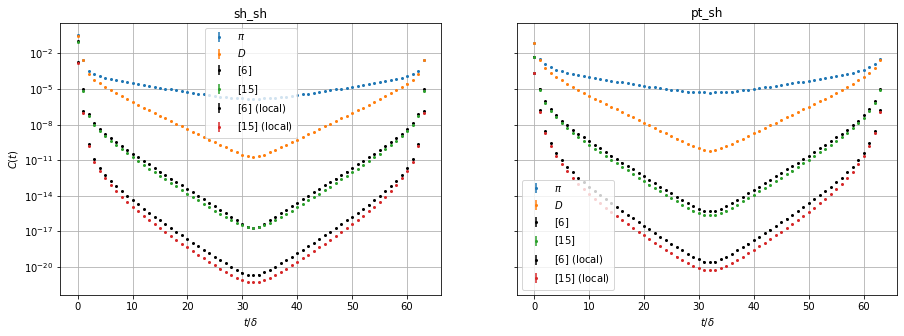

In [64]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True,figsize=(15,5))
ax = axs[0]
ax.errorbar([t for t in range(nt)], np.real(qG1q_sh_avg),yerr=Rerr_qG1q_sh , fmt='o', markersize='2',label=r'$\pi$')
ax.errorbar([t for t in range(nt)], np.real(QG2q_sh_avg),yerr=Rerr_QG2q_sh , fmt='o', markersize='2',label=r'$D$')
ax.errorbar([t for t in range(nt)], np.real(r6_sh_avg),yerr=Rerr_r6_sh , fmt='ko', markersize='2',label=r'$[6]$')
ax.errorbar([t for t in range(nt)], np.real(r15_sh_avg),yerr=Rerr_r15_sh , fmt='o', markersize='2',label=r'$[15]$')
ax.errorbar([t for t in range(nt)], np.real(r6_P0_sh_avg),yerr=Rerr_P0_r6_sh , fmt='ko', markersize='2',label=r'$[6]$ (local)')
ax.errorbar([t for t in range(nt)], np.real(r15_P0_sh_avg),yerr=Rerr_P0_r15_sh , fmt='o', markersize='2',label=r'$[15]$ (local)')
ax.set_yscale('log')
ax.grid('True')
ax.set_xlabel(r'$t/\delta$')
ax.set_ylabel(r'$C(t)$')
ax.set_title('sh_sh')
ax.legend(loc="best")

ax = axs[1]
ax.errorbar([t for t in range(nt)], np.real(qG1q_pt_avg),yerr=Rerr_qG1q_pt , fmt='o', markersize='2',label=r'$\pi$')
ax.errorbar([t for t in range(nt)], np.real(QG2q_pt_avg),yerr=Rerr_QG2q_pt , fmt='o', markersize='2',label=r'$D$')
ax.errorbar([t for t in range(nt)], np.real(r6_pt_avg),yerr=Rerr_r6_pt , fmt='ko', markersize='2',label=r'$[6]$')
ax.errorbar([t for t in range(nt)], np.real(r15_pt_avg),yerr=Rerr_r15_pt , fmt='o', markersize='2',label=r'$[15]$')
ax.errorbar([t for t in range(nt)], np.real(r6_P0_pt_avg),yerr=Rerr_P0_r6_pt , fmt='ko', markersize='2',label=r'$[6]$ (local)')
ax.errorbar([t for t in range(nt)], np.real(r15_P0_pt_avg),yerr=Rerr_P0_r15_pt , fmt='o', markersize='2',label=r'$[15]$ (local)')
ax.set_yscale('log')
ax.grid('True')
ax.set_xlabel(r'$t/\delta$')
ax.set_title('pt_sh')
ax.legend(loc='best');

# Standard Cosh Effective Masses

In [7]:
# this routine folds the correlator in half by averaging the early and late times.  
# assumes that the correlators are symmetric about $\beta/2$
def foldCorrelators(corr):
    nt=len(corr[0])
    foldedCorr=[]
    for cfg in range(len(corr)):
        cc=[corr[cfg][0]]
        for t in range(1,int(nt/2)+1):
            cc.append(.5*(corr[cfg][t]+corr[cfg][nt-t]))
        foldedCorr.append(cc)
    return np.array(foldedCorr)
        

I now fold the correlators in half and just take the real parts (the imaginary parts are much smaller than the real part (in some cases they are zero), and must vanish in the limit of infinite statistics, so I ignore it)

In [264]:
qG1q_sh_folded = np.real(foldCorrelators(qG1q_sh))
QG2q_sh_folded = np.real(foldCorrelators(QG2q_sh))
r6_sh_folded = np.real(foldCorrelators(r6_sh))
r15_sh_folded = np.real(foldCorrelators(r15_sh))
r6_P0_sh_folded = np.real(foldCorrelators(r6_P0_sh))
r15_P0_sh_folded = np.real(foldCorrelators(r15_P0_sh))

qG1q_pt_folded = np.real(foldCorrelators(qG1q_pt))
QG2q_pt_folded = np.real(foldCorrelators(QG2q_pt))
r6_pt_folded = np.real(foldCorrelators(r6_pt))
r15_pt_folded = np.real(foldCorrelators(r15_pt))
r6_P0_pt_folded = np.real(foldCorrelators(r6_P0_pt))
r15_P0_pt_folded = np.real(foldCorrelators(r15_P0_pt))

Now I build the arrays of effective Cosh masses, which are calculated as
\begin{equation}
E(t)=\frac{1}{\delta J}\cosh^{-1}\left(\frac{C\left(t+\delta J\right)+C\left(t-\delta J\right)}{2C\left(t\right)}\right)
\end{equation}
where $\delta J$ is some parameter that can be varied to investigate systematics.

In [265]:
deltaJ = 1  # here I set delta J

effM_qG1q_sh = []
effM_QG2q_sh = []
effM_r6_sh = []
effM_r15_sh = []
effM_P0_r6_sh = []
effM_P0_r15_sh = []

effM_qG1q_pt = []
effM_QG2q_pt = []
effM_r6_pt = []
effM_r15_pt = []
effM_P0_r6_pt = []
effM_P0_r15_pt = []

for cfg in range(numCfg):
    effM = []
    for t in range(deltaJ,int(nt/2)+1-deltaJ):
        effM.append( np.arccosh((qG1q_sh_folded[cfg][t+deltaJ]+qG1q_sh_folded[cfg][t-deltaJ])/(2*qG1q_sh_folded[cfg][t]))/deltaJ )
    effM_qG1q_sh.append(np.array(effM))
    effM = []
    for t in range(deltaJ,int(nt/2)+1-deltaJ):
        effM.append( np.arccosh((QG2q_sh_folded[cfg][t+deltaJ]+QG2q_sh_folded[cfg][t-deltaJ])/(2*QG2q_sh_folded[cfg][t]))/deltaJ )
    effM_QG2q_sh.append(np.array(effM))
    effM = []
    for t in range(deltaJ,int(nt/2)+1-deltaJ):
        effM.append( np.arccosh((r6_sh_folded[cfg][t+deltaJ]+r6_sh_folded[cfg][t-deltaJ])/(2*r6_sh_folded[cfg][t]))/deltaJ )
    effM_r6_sh.append(np.array(effM))
    effM = []
    for t in range(deltaJ,int(nt/2)+1-deltaJ):
        effM.append( np.arccosh((r15_sh_folded[cfg][t+deltaJ]+r15_sh_folded[cfg][t-deltaJ])/(2*r15_sh_folded[cfg][t]))/deltaJ )
    effM_r15_sh.append(np.array(effM))
    effM = []
    for t in range(deltaJ,int(nt/2)+1-deltaJ):
        effM.append( np.arccosh((r6_P0_sh_folded[cfg][t+deltaJ]+r6_P0_sh_folded[cfg][t-deltaJ])/(2*r6_P0_sh_folded[cfg][t]))/deltaJ )
    effM_P0_r6_sh.append(np.array(effM))
    effM = []
    for t in range(deltaJ,int(nt/2)+1-deltaJ):
        effM.append( np.arccosh((r15_P0_sh_folded[cfg][t+deltaJ]+r15_P0_sh_folded[cfg][t-deltaJ])/(2*r15_P0_sh_folded[cfg][t]))/deltaJ )
    effM_P0_r15_sh.append(np.array(effM))
    
    effM = []
    for t in range(deltaJ,int(nt/2)+1-deltaJ):
        effM.append( np.arccosh((qG1q_pt_folded[cfg][t+deltaJ]+qG1q_pt_folded[cfg][t-deltaJ])/(2*qG1q_pt_folded[cfg][t]))/deltaJ )
    effM_qG1q_pt.append(np.array(effM))
    effM = []
    for t in range(deltaJ,int(nt/2)+1-deltaJ):
        effM.append( np.arccosh((QG2q_pt_folded[cfg][t+deltaJ]+QG2q_pt_folded[cfg][t-deltaJ])/(2*QG2q_pt_folded[cfg][t]))/deltaJ )
    effM_QG2q_pt.append(np.array(effM))
    effM = []
    for t in range(deltaJ,int(nt/2)+1-deltaJ):
        effM.append( np.arccosh((r6_pt_folded[cfg][t+deltaJ]+r6_pt_folded[cfg][t-deltaJ])/(2*r6_pt_folded[cfg][t]))/deltaJ )
    effM_r6_pt.append(np.array(effM))
    effM = []
    for t in range(deltaJ,int(nt/2)+1-deltaJ):
        effM.append( np.arccosh((r15_pt_folded[cfg][t+deltaJ]+r15_pt_folded[cfg][t-deltaJ])/(2*r15_pt_folded[cfg][t]))/deltaJ )
    effM_r15_pt.append(np.array(effM))
    effM = []
    for t in range(deltaJ,int(nt/2)+1-deltaJ):
        effM.append( np.arccosh((r6_P0_pt_folded[cfg][t+deltaJ]+r6_P0_pt_folded[cfg][t-deltaJ])/(2*r6_P0_pt_folded[cfg][t]))/deltaJ )
    effM_P0_r6_pt.append(np.array(effM))
    effM = []
    for t in range(deltaJ,int(nt/2)+1-deltaJ):
        effM.append( np.arccosh((r15_P0_pt_folded[cfg][t+deltaJ]+r15_P0_pt_folded[cfg][t-deltaJ])/(2*r15_P0_pt_folded[cfg][t]))/deltaJ )
    effM_P0_r15_pt.append(np.array(effM))



<ipython-input-265-c25c3a8cf333>:61: RuntimeWarning: invalid value encountered in arccosh
  effM.append( np.arccosh((r6_P0_pt_folded[cfg][t+deltaJ]+r6_P0_pt_folded[cfg][t-deltaJ])/(2*r6_P0_pt_folded[cfg][t]))/deltaJ )


Now I bootstrap the simple effective Cosh masses

In [266]:
effM_qG1q_sh_avg = np.mean(effM_qG1q_sh, axis=0)
effM_QG2q_sh_avg = np.mean(effM_QG2q_sh, axis=0)
effM_r6_sh_avg = np.mean(effM_r6_sh, axis=0)
effM_r15_sh_avg = np.mean(effM_r15_sh, axis=0)
effM_P0_r6_sh_avg = np.mean(effM_P0_r6_sh, axis=0)
effM_P0_r15_sh_avg = np.mean(effM_P0_r15_sh, axis=0)

effM_qG1q_pt_avg = np.mean(effM_qG1q_pt, axis=0)
effM_QG2q_pt_avg = np.mean(effM_QG2q_pt, axis=0)
effM_r6_pt_avg = np.mean(effM_r6_pt, axis=0)
effM_r15_pt_avg = np.mean(effM_r15_pt, axis=0)
effM_P0_r6_pt_avg = np.mean(effM_P0_r6_pt, axis=0)
effM_P0_r15_pt_avg = np.mean(effM_P0_r15_pt, axis=0)

CFGS = numCfg
NBS = 4*CFGS
samples = np.random.randint(0, CFGS, [NBS, CFGS])

effM_Rerr_qG1q_sh = np.std(np.real(np.array([np.mean(np.array([effM_qG1q_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
effM_Ierr_qG1q_sh = np.std(np.imag(np.array([np.mean(np.array([effM_qG1q_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

effM_Rerr_QG2q_sh = np.std(np.real(np.array([np.mean(np.array([effM_QG2q_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
effM_Ierr_QG2q_sh = np.std(np.imag(np.array([np.mean(np.array([effM_QG2q_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

effM_Rerr_r15_sh = np.std(np.real(np.array([np.mean(np.array([effM_r15_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
effM_Ierr_r15_sh = np.std(np.imag(np.array([np.mean(np.array([effM_r15_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

effM_Rerr_r6_sh = np.std(np.real(np.array([np.mean(np.array([effM_r6_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
effM_Ierr_r6_sh = np.std(np.imag(np.array([np.mean(np.array([effM_r6_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

effM_P0_Rerr_r15_sh = np.std(np.real(np.array([np.mean(np.array([effM_P0_r15_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
effM_P0_Ierr_r15_sh = np.std(np.imag(np.array([np.mean(np.array([effM_P0_r15_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

effM_P0_Rerr_r6_sh = np.std(np.real(np.array([np.mean(np.array([effM_P0_r6_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
effM_P0_Ierr_r6_sh = np.std(np.imag(np.array([np.mean(np.array([effM_P0_r6_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

effM_Rerr_qG1q_pt = np.std(np.real(np.array([np.mean(np.array([effM_qG1q_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
effM_Ierr_qG1q_pt = np.std(np.imag(np.array([np.mean(np.array([effM_qG1q_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

effM_Rerr_QG2q_pt = np.std(np.real(np.array([np.mean(np.array([effM_QG2q_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
effM_Ierr_QG2q_pt = np.std(np.imag(np.array([np.mean(np.array([effM_QG2q_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

effM_Rerr_r15_pt = np.std(np.real(np.array([np.mean(np.array([effM_r15_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
effM_Ierr_r15_pt = np.std(np.imag(np.array([np.mean(np.array([effM_r15_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

effM_Rerr_r6_pt = np.std(np.real(np.array([np.mean(np.array([effM_r6_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
effM_Ierr_r6_pt = np.std(np.imag(np.array([np.mean(np.array([effM_r6_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

effM_P0_Rerr_r15_pt = np.std(np.real(np.array([np.mean(np.array([effM_P0_r15_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
effM_P0_Ierr_r15_pt = np.std(np.imag(np.array([np.mean(np.array([effM_P0_r15_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

effM_P0_Rerr_r6_pt = np.std(np.real(np.array([np.mean(np.array([effM_P0_r6_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
effM_P0_Ierr_r6_pt = np.std(np.imag(np.array([np.mean(np.array([effM_P0_r6_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

Now we plot the cosh effective masses:

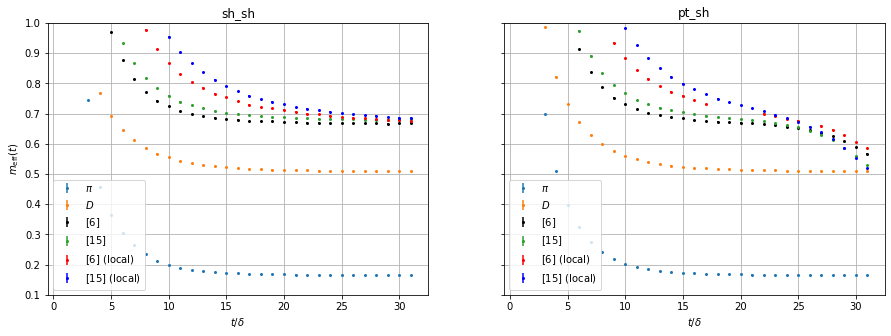

In [267]:
tmax = len(effM_qG1q_sh_avg)+1
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True,figsize=(15,5))
ax = axs[0]
ax.errorbar([t for t in range(deltaJ,tmax)], np.real(effM_qG1q_sh_avg),yerr=effM_Rerr_qG1q_sh , fmt='o', markersize='2',label=r'$\pi$')
ax.errorbar([t for t in range(deltaJ,tmax)], np.real(effM_QG2q_sh_avg),yerr=effM_Rerr_QG2q_sh , fmt='o', markersize='2',label=r'$D$')
ax.errorbar([t for t in range(deltaJ,tmax)], np.real(effM_r6_sh_avg),yerr=effM_Rerr_r6_sh , fmt='ko', markersize='2',label=r'$[6]$')
ax.errorbar([t for t in range(deltaJ,tmax)], np.real(effM_r15_sh_avg),yerr=effM_Rerr_r15_sh , fmt='o', markersize='2',label=r'$[15]$')
ax.errorbar([t for t in range(deltaJ,tmax)], np.real(effM_P0_r6_sh_avg),yerr=effM_P0_Rerr_r6_sh , fmt='ro', markersize='2',label=r'$[6]$ (local)')
ax.errorbar([t for t in range(deltaJ,tmax)], np.real(effM_P0_r15_sh_avg),yerr=effM_P0_Rerr_r15_sh , fmt='bo', markersize='2',label=r'$[15]$ (local)')
ax.grid('True')
ax.set_xlabel(r'$t/\delta$')
ax.set_ylabel(r'$m_{\operatorname{eff}}(t)$')
ax.set_title('sh_sh')
ax.legend(loc="best")
ax.set_ylim(.1,1)

ax = axs[1]
ax.errorbar([t for t in range(deltaJ,tmax)], np.real(effM_qG1q_pt_avg),yerr=effM_Rerr_qG1q_pt , fmt='o', markersize='2',label=r'$\pi$')
ax.errorbar([t for t in range(deltaJ,tmax)], np.real(effM_QG2q_pt_avg),yerr=effM_Rerr_QG2q_pt , fmt='o', markersize='2',label=r'$D$')
ax.errorbar([t for t in range(deltaJ,tmax)], np.real(effM_r6_pt_avg),yerr=effM_Rerr_r6_pt , fmt='ko', markersize='2',label=r'$[6]$')
ax.errorbar([t for t in range(deltaJ,tmax)], np.real(effM_r15_pt_avg),yerr=effM_Rerr_r15_pt , fmt='o', markersize='2',label=r'$[15]$')
ax.errorbar([t for t in range(deltaJ,tmax)], np.real(effM_P0_r6_pt_avg),yerr=effM_P0_Rerr_r6_pt , fmt='ro', markersize='2',label=r'$[6]$ (local)')
ax.errorbar([t for t in range(deltaJ,tmax)], np.real(effM_P0_r15_pt_avg),yerr=effM_P0_Rerr_r15_pt , fmt='bo', markersize='2',label=r'$[15]$ (local)')
ax.grid('True')
ax.set_xlabel(r'$t/\delta$')
ax.set_title('pt_sh')
ax.legend(loc='best');

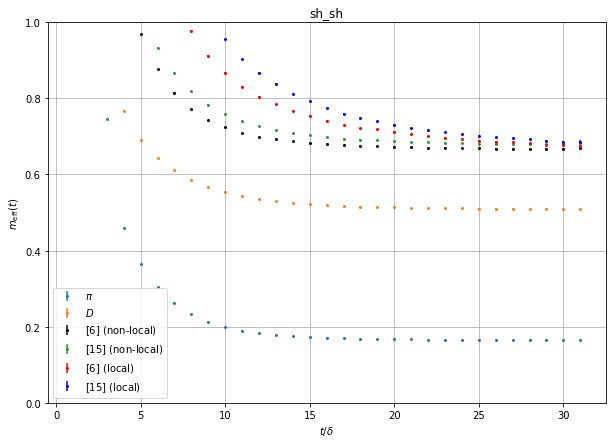

In [276]:
tmax = len(effM_qG1q_sh_avg)+1
fig, axs = plt.subplots(nrows=1, ncols=1, sharey=True,figsize=(10,7))
ax = axs
ax.errorbar([t for t in range(deltaJ,tmax)], np.real(effM_qG1q_sh_avg),yerr=effM_Rerr_qG1q_sh , fmt='o', markersize='2',label=r'$\pi$')
ax.errorbar([t for t in range(deltaJ,tmax)], np.real(effM_QG2q_sh_avg),yerr=effM_Rerr_QG2q_sh , fmt='o', markersize='2',label=r'$D$')
ax.errorbar([t for t in range(deltaJ,tmax)], np.real(effM_r6_sh_avg),yerr=effM_Rerr_r6_sh , fmt='ko', markersize='2',label=r'$[6]$ (non-local)')
ax.errorbar([t for t in range(deltaJ,tmax)], np.real(effM_r15_sh_avg),yerr=effM_Rerr_r15_sh , fmt='o', markersize='2',label=r'$[15]$ (non-local)')
ax.errorbar([t for t in range(deltaJ,tmax)], np.real(effM_P0_r6_sh_avg),yerr=effM_P0_Rerr_r6_sh , fmt='ro', markersize='2',label=r'$[6]$ (local)')
ax.errorbar([t for t in range(deltaJ,tmax)], np.real(effM_P0_r15_sh_avg),yerr=effM_P0_Rerr_r15_sh , fmt='bo', markersize='2',label=r'$[15]$ (local)')
ax.grid('True')
ax.set_xlabel(r'$t/\delta$')
ax.set_ylabel(r'$m_{\operatorname{eff}}(t)$')
ax.set_title('sh_sh')
ax.legend(loc="best")
ax.set_ylim(0,1);

Now I do a first attempt at getting the energy shifts by calculating, for example,
\begin{equation}
\Delta E_6(t)=E_6(t)-\left(E_\pi(t)+E_D(t)\right)
\end{equation}

In [12]:
be6_sh = []
be15_sh = []
be6_pt = []
be15_pt = []

for cfg in range(numCfg):
    be = [ effM_r15_sh[cfg][t]-effM_qG1q_sh[cfg][t]-effM_QG2q_sh[cfg][t] for t in range(len(effM_r15_sh[cfg])) ]
    be15_sh.append(np.array(be))
    be = [ effM_r6_sh[cfg][t]-effM_qG1q_sh[cfg][t]-effM_QG2q_sh[cfg][t] for t in range(len(effM_r6_sh[cfg])) ]
    be6_sh.append(np.array(be))
    be = [ effM_r15_pt[cfg][t]-effM_qG1q_pt[cfg][t]-effM_QG2q_pt[cfg][t] for t in range(len(effM_r15_pt[cfg])) ]
    be15_pt.append(np.array(be))
    be = [ effM_r6_pt[cfg][t]-effM_qG1q_pt[cfg][t]-effM_QG2q_pt[cfg][t] for t in range(len(effM_r6_pt[cfg])) ]
    be6_pt.append(np.array(be))

be6_sh = np.array(be6_sh)
be15_sh = np.array(be15_sh)
be6_pt = np.array(be6_pt)
be15_pt = np.array(be15_pt)

And then I bootstrap the energies

In [13]:
be6_sh_avg = np.mean(be6_sh, axis=0)
be15_sh_avg = np.mean(be15_sh, axis=0)
be6_pt_avg = np.mean(be6_pt, axis=0)
be15_pt_avg = np.mean(be15_pt, axis=0)

CFGS = numCfg
NBS = 4*CFGS
samples = np.random.randint(0, CFGS, [NBS, CFGS])

be15_Rerr_sh = np.std(np.real(np.array([np.mean(np.array([be15_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
be6_Rerr_sh = np.std(np.real(np.array([np.mean(np.array([be6_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
be15_Rerr_pt = np.std(np.real(np.array([np.mean(np.array([be15_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
be6_Rerr_pt = np.std(np.real(np.array([np.mean(np.array([be6_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)


And here is the plot of the energy differences:

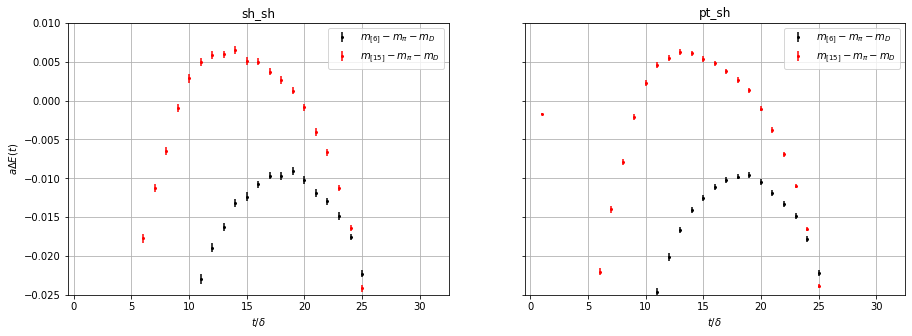

In [14]:
tmax = len(effM_qG1q_sh_avg)+1
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True,figsize=(15,5))
ax = axs[0]
ax.errorbar([t for t in range(deltaJ,tmax)], np.real(be6_sh_avg),yerr=be6_Rerr_sh , fmt='ko', markersize='2',label=r'$m_{[6]}-m_\pi-m_D$')
ax.errorbar([t for t in range(deltaJ,tmax)], np.real(be15_sh_avg),yerr=be15_Rerr_sh , fmt='ro', markersize='2',label=r'$m_{[15]}-m_\pi-m_D$')
ax.grid('True')
ax.set_xlabel(r'$t/\delta$')
ax.set_ylabel(r'$a\Delta E(t)$')
ax.set_title('sh_sh')
ax.legend(loc="upper right")
ax.set_ylim(-.025,.01)

ax = axs[1]
ax.errorbar([t for t in range(deltaJ,tmax)], np.real(be6_pt_avg),yerr=be6_Rerr_pt , fmt='ko', markersize='2',label=r'$m_{[6]}-m_\pi-m_D$')
ax.errorbar([t for t in range(deltaJ,tmax)], np.real(be15_pt_avg),yerr=be15_Rerr_pt , fmt='ro', markersize='2',label=r'$m_{[15]}-m_\pi-m_D$')
ax.grid('True')
ax.set_xlabel(r'$t/\delta$')
ax.set_title('pt_sh')
ax.legend(loc='upper right');

# Matrix Prony

The methods used here are taken from 

    @article{Beane:2009kya,
    author = "Beane, Silas R. and Detmold, William and Luu, Thomas C. and Orginos, Kostas and Parreno, Assumpta and Savage, Martin J. and Torok, Aaron and Walker-Loud, Andre",
    title = "{High Statistics Analysis using Anisotropic Clover Lattices: (I) Single Hadron Correlation Functions}",
    eprint = "0903.2990",
    archivePrefix = "arXiv",
    primaryClass = "hep-lat",
    reportNumber = "UNH-09-01, JLAB-THY-09-960, NT@UW-09-08, ICCUB-09-18, ATHENA-PUB-09-012",
    doi = "10.1103/PhysRevD.79.114502",
    journal = "Phys. Rev. D",
    volume = "79",
    pages = "114502",
    year = "2009"
    }


## 2-exp Prony applied to a single correlator

For a detailed description, look at section IV.C.2 of the paper cited above. The idea is to determine the $C$ values of the following equations (eq.16 of the paper)
\begin{align}
G(t+2 n)+C_{1} G(t+n)+C_{0} G(t) &=0 \\
G\left(t+2 n+q_{1}\right)+C_{1} G\left(t+n+q_{1}\right)+C_{0} G\left(t+q_{1}\right) &=0
\end{align}
where $G(t)$ is the correlator.  The routine

    def calcCs(corr,t0,n,q1)
    
does this.  Once the $C$s are obtained, one extracts the energies from the following equation (eq.17 of the paper):
\begin{equation}
\left(e^{-n \alpha}\right)^{2}+C_{1}\left(e^{-n \alpha}\right)+C_{0}=0
\end{equation}
The routine

    def calcEnergies(corr,t0,n,q1)
    
does exactly this.  

The energies extracted in this manner represent the 2-exp fit to the correlator $G(t)$ in the time window $[t_0,t_0+2n+q_1]$.

In [7]:
def calcCs(corr,t0,n,q1):
    V=np.array([corr[t0+2*n],corr[t0+2*n+q1]])
    C=np.matrix([[corr[t0],corr[t0+n]],[corr[t0+q1],corr[t0+n+q1]]])
    return -np.linalg.inv(C)@V

def calcEnergies(corr,t0,n,q1):
    Cs=calcCs(corr,t0,n,q1)
    return -np.log(.5*np.array([-Cs[0,1]+np.sqrt(Cs[0,1]*Cs[0,1]-4.*Cs[0,0]),
                                -Cs[0,1]-np.sqrt(Cs[0,1]*Cs[0,1]-4.*Cs[0,0])]))/n

Here's a test calculation:

In [16]:
calcEnergies(qG1q_sh_avg,0,1,1)

array([0.60082427+1.12325780e-21j, 4.90692988-2.99287167e-21j])

Now I want to compare all the different methods up to this point:

In [17]:
ee=[ calcEnergies(qG1q_sh_avg,t,1,1) for t in range(len(qG1q_sh_avg)-3) ]
e0=[ min(np.real(ee[t][0]),np.real(ee[t][1])) for t in range(len(ee))]
e1=[ max(np.real(ee[t][0]),np.real(ee[t][1])) for t in range(len(ee))]
effMCosh = [np.arccosh(np.real((qG1q_sh_avg[t+1]+qG1q_sh_avg[t-1])/(2*qG1q_sh_avg[t]))) 
        for t in range(1,len(qG1q_sh_avg)-1)]
effMExp = [-np.log(np.real((qG1q_sh_avg[t+1])/(qG1q_sh_avg[t]))) 
        for t in range(0,len(qG1q_sh_avg)-1)]

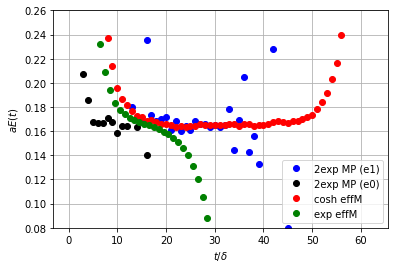

In [19]:
plt.ylim((.08,.26))
plt.grid("True")
plt.plot([t for t in range(len(e1))],e1,'bo',label='2exp MP (e1)')
plt.plot([t for t in range(len(e0))],e0,'ko',label='2exp MP (e0)')
plt.plot([t for t in range(1,len(effMCosh)+1)],effMCosh,'ro',label='cosh effM')
plt.plot([t+.5 for t in range(len(effMExp))],effMExp,'go',label='exp effM')
plt.legend(loc='best')
plt.xlabel(r'$t/\delta$')
plt.ylabel(r'$aE(t)$');

## Matrix Prony applied to 2-correlators

This method is discussed in detail in section IV.D of the paper cited above.  Given the matrices (eq.26 of paper)
\begin{equation}
M=\left[\sum_{\tau=t}^{t+t_{W}} y\left(\tau+t_{J}\right) y(\tau)^{T}\right]^{-1} \quad, \quad V=\left[\sum_{\tau=t}^{t+t_{W}} y(\tau) y(\tau)^{T}\right]^{-1}
\end{equation}
where
\begin{equation}
y(t)=\begin{pmatrix}
G_0(t)\\
G_1(t)\\
\end{pmatrix}
\end{equation}
contains the two correlators (e.g. sh-pt and pt-pt), we solve the following eigenvalue problem (eq.24)
\begin{equation}
M q=\lambda V q
\end{equation}
where $\lambda$ and $q$ are the eigenvalues and eigenvectors, respectively.  The energies are related to the eigenvalues $\lambda$ via
\begin{equation}
\lambda_{n}=\exp \left(m_{n} t_{J}\right)
\end{equation}

The routine that calculates the matrices M and V is given by

    def calcMandV(corr_pt,corr_sh,t,tj,tw)

and the routine that determines the energy eigenvalues is

    def calcEigs(M,invV,tj)
    

In [30]:
def calcMandV(corr_pt,corr_sh,t,tj,tw):
    V = np.matrix([[0.0,0.0],[0.0,0.0]])
    M = np.matrix([[0.0,0.0],[0.0,0.0]])
    for tau in range(t,t+tw):
        V += np.matrix([[corr_pt[tau]*corr_pt[tau],corr_pt[tau]*corr_sh[tau]],
                        [corr_sh[tau]*corr_pt[tau],corr_sh[tau]*corr_sh[tau]]])
        M += np.matrix([[corr_pt[tau+tj]*corr_pt[tau],corr_pt[tau+tj]*corr_sh[tau]],
                        [corr_sh[tau+tj]*corr_pt[tau],corr_sh[tau+tj]*corr_sh[tau]]])
    M = np.linalg.inv(M)  # returns the inverse of M
    return M,V
    
def calcEigs(M,invV,tj):
    eigenValues, eigenVectors = np.linalg.eig(M@invV)
    #print(eigenVectors)
    idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]

    return np.log(eigenValues)/tj

def matrixPronyEnergies(corr_pt,corr_sh,t,tj,tw):
    M, invV = calcMandV(corr_pt,corr_sh,t,tj,tw)
    return calcEigs(M,invV,tj)

def calcEigSys(M,invV):
    eigenValues, eigenVectors = np.linalg.eig(M@invV)
    #print(eigenVectors)
    idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]

    return eigenValues,invV@eigenVectors

def fitEffM(x, c):
    return c

Once the matrix $M$ and $V$ are determined, as well as the eigenvalues and eigenvectors $\lambda$ and $q$, the coefficients $C_n$ can be determined in the following equation
\begin{equation}
y(t)=\sum_{n=1}^{N} C_{n} q_{n} \lambda_{n}^{t}
\end{equation}
With these coefficients, one can construct linear combinations of the correlators where one combination has the ground state as the dominant contribution, and the other has the excited state being dominant.

So now I'll try to do this with all the correlators:

In [31]:
# fold the correlators again (just in case I didn't do this earlier)
qG1q_sh_folded_avg = np.real(np.mean(qG1q_sh_folded,axis=0))
QG2q_sh_folded_avg = np.real(np.mean(QG2q_sh_folded,axis=0))
r6_sh_folded_avg = np.real(np.mean(r6_sh_folded,axis=0))
r15_sh_folded_avg = np.real(np.mean(r15_sh_folded,axis=0))

qG1q_pt_folded_avg = np.real(np.mean(qG1q_pt_folded,axis=0))
QG2q_pt_folded_avg = np.real(np.mean(QG2q_pt_folded,axis=0))
r6_pt_folded_avg = np.real(np.mean(r6_pt_folded,axis=0))
r15_pt_folded_avg = np.real(np.mean(r15_pt_folded,axis=0))

Let's bootstrap the whole Matrix-Prony multi-correlator process.  Let's do the qG1q case first

<ipython-input-32-e2caf4bcb10b>:41: RuntimeWarning: invalid value encountered in arccosh
  eM = [np.arccosh((corrRotated[t+1]+corrRotated[t-1])/(2*corrRotated[t]))


matrix prony energy:  0.16631462606329764 +/- 0.00037264505523209224
cosh energy        :  0.16662469198426463 +/- 0.0003508581950573111


<ipython-input-32-e2caf4bcb10b>:55: RuntimeWarning: Mean of empty slice
  effM_avg = np.nanmean(np.array(effMCosh), axis=0)
/usr/local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


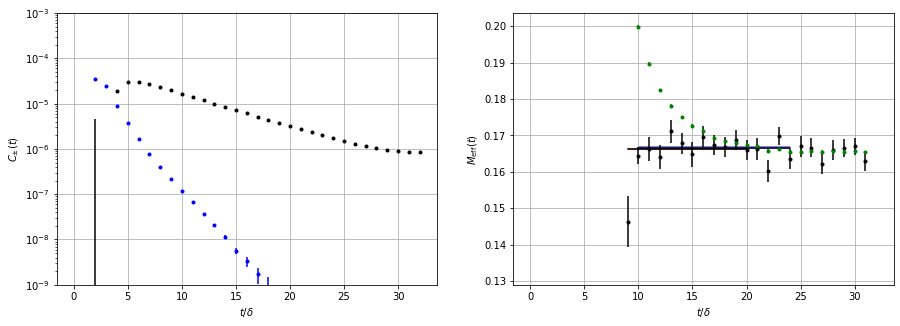

In [32]:
corr_pt=qG1q_pt_folded
corr_sh=qG1q_sh_folded
effMcorr_avg = effM_qG1q_sh_avg
effMcorr_err = effM_Rerr_qG1q_sh
t0=8;tj=2;tw=23
t0=9;tj=1;tw=10

# fit window
tmin=10; tmax=t0+15

CFGS = numCfg
NBS = 4*CFGS
samples = np.random.randint(0, CFGS, [NBS, CFGS])

effM = []
effMCosh = []

effMConst_fit = []

corr0 = []
corr1 = []

for sample in range(NBS):
    # first generate a bootstrap ensemble
    bscorr_pt_avg = np.nanmean(np.array([corr_pt[cfg] for cfg in samples[sample]]), axis = 0)
    bscorr_sh_avg = np.nanmean(np.array([corr_sh[cfg] for cfg in samples[sample]]), axis = 0)
    # now get the energies and coefficients
    M, invV = calcMandV(bscorr_pt_avg,bscorr_sh_avg,t0,tj,tw)
    lam, q = calcEigSys(M,invV)
    c=np.array([corr_pt[t0],corr_sh[t0]])
    m=np.matrix([[lam[0]*q[0,0],lam[1]*q[0,1]],
                 [lam[0]*q[1,0],lam[1]*q[1,1]]])
    cs=np.linalg.inv(m)@c
    alpha1=cs[0,0]*q[0,0];beta1=cs[0,1]*q[0,1]
    alpha2=cs[0,0]*q[1,0];beta2=cs[0,1]*q[1,1]
    effM.append(np.log(lam[1])/tj)
    # now rotate the corelators and calculate Cosh effective mass
    corrRotated=alpha2*bscorr_pt_avg-alpha1*bscorr_sh_avg
    corr0.append(corrRotated)
    corr1.append(-beta2*bscorr_pt_avg+beta1*bscorr_sh_avg)
    eM = [np.arccosh((corrRotated[t+1]+corrRotated[t-1])/(2*corrRotated[t])) 
        for t in range(1,len(corrRotated)-1)]
    effMCosh.append(eM)
    # now fit effective mass
    effMConst_fit.append(np.nanmean(np.array([eM[t] for t in range(tmin,tmax+1)])))

# ok, now calculate bootstrap errors and means
effM_fit_avg = np.nanmean(np.array(effM))
effM_fit_err = np.nanstd(np.array(effM))
print("matrix prony energy: ", effM_fit_avg,"+/-",effM_fit_err)
effMConst_fit_avg = np.nanmean(np.array(effMConst_fit))
effMConst_fit_err = np.nanstd(np.array(effMConst_fit))
print("cosh energy        : ",effMConst_fit_avg,"+/-",effMConst_fit_err)                         
                         
effM_avg = np.nanmean(np.array(effMCosh), axis=0)
effM_err = np.nanstd(np.array(effMCosh), axis=0)


fig, ax = plt.subplots(1,2,sharex=True,figsize=(15,5))

ax[0].grid("True")
ax[0].set_yscale('log')
ax[0].set_ylim(1e-9,1e-3)
ax[0].errorbar([t for t in range(len(corr0[0]))], np.nanmean(corr0, axis=0),yerr=np.nanstd(corr0, axis=0) , 
             fmt='ko', markersize='3',label=r'$C_0(t)$')
ax[0].errorbar([t for t in range(len(corr1[0]))], np.nanmean(corr1, axis=0),yerr=np.nanstd(corr1, axis=0) , 
             fmt='bo', markersize='3',label=r'$C_1(t)$')
ax[0].set_xlabel(r'$t/\delta$')
ax[0].set_ylabel(r'$C_{\pm}(t)$')

ax[1].set_yscale('linear')
ax[1].grid("True")
ax[1].set_xlabel(r'$t/\delta$')
ax[1].set_ylabel(r'$M_{\operatorname{eff}}(t)$')
ax[1].set_ylim(effM_fit_avg-100*effM_fit_err,effM_fit_avg+100*effM_fit_err)
ax[1].errorbar([t for t in range(1,len(effM_avg)+1)], effM_avg,yerr=effM_err , 
             fmt='ko', markersize='3',label=r'cosh')
ax[1].errorbar([t for t in range(1,len(effMcorr_avg)+1)], np.real(effMcorr_avg),yerr=effMcorr_err , 
         fmt='go', markersize='3',label=r'matrix prony')
ax[1].add_patch(patches.Rectangle((t0,effM_fit_avg-effM_fit_err), tw+tj, 2*effM_fit_err,
                               fill='True',facecolor='red',alpha=.5))
ax[1].plot([t0,t0+tw+tj],[effM_fit_avg,effM_fit_avg],'k-')
                         
ax[1].add_patch(patches.Rectangle((tmin,effMConst_fit_avg-effMConst_fit_err), tmax-tmin, 2*effMConst_fit_err,
                               fill='True',facecolor='blue',alpha=.5))
ax[1].plot([tmin,tmax],[effMConst_fit_avg,effMConst_fit_avg],'k-');



<ipython-input-34-f9ec8f867178>:41: RuntimeWarning: invalid value encountered in arccosh
  eM = [np.arccosh((corrRotated[t+1]+corrRotated[t-1])/(2*corrRotated[t]))


matrix prony energy:  0.5088298972564864 +/- 0.002137957997368639
cosh energy        :  0.5095879257316815 +/- 0.001149071210530232


<ipython-input-34-f9ec8f867178>:55: RuntimeWarning: Mean of empty slice
  effM_avg = np.nanmean(np.array(effMCosh), axis=0)


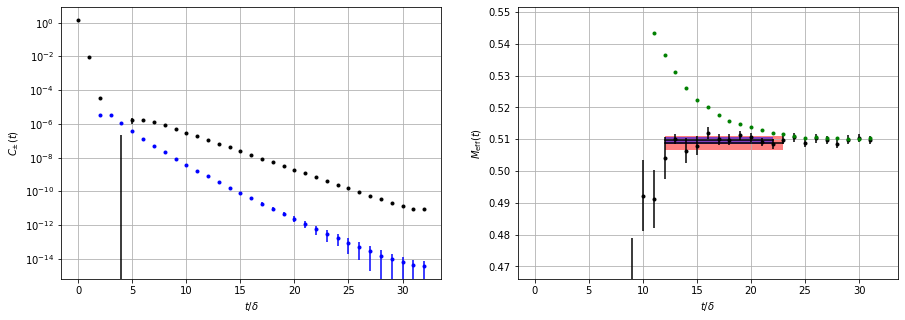

In [34]:
corr_pt=QG2q_pt_folded
corr_sh=QG2q_sh_folded
effMcorr_avg = effM_QG2q_sh_avg
effMcorr_err = effM_Rerr_QG2q_sh
t0=15;tj=2;tw=16
t0=12;tj=1;tw=10

# fit window
tmin=12; tmax=tmin+10

CFGS = numCfg
NBS = 4*CFGS
samples = np.random.randint(0, CFGS, [NBS, CFGS])

effM = []
effMCosh = []

effMConst_fit = []

corr0 = []
corr1 = []

for sample in range(NBS):
    # first generate a bootstrap ensemble
    bscorr_pt_avg = np.mean(np.array([corr_pt[cfg] for cfg in samples[sample]]), axis = 0)
    bscorr_sh_avg = np.mean(np.array([corr_sh[cfg] for cfg in samples[sample]]), axis = 0)
    # now get the energies and coefficients
    M, invV = calcMandV(bscorr_pt_avg,bscorr_sh_avg,t0,tj,tw)
    lam, q = calcEigSys(M,invV)
    c=np.array([corr_pt[t0],corr_sh[t0]])
    m=np.matrix([[lam[0]*q[0,0],lam[1]*q[0,1]],
                 [lam[0]*q[1,0],lam[1]*q[1,1]]])
    cs=np.linalg.inv(m)@c
    alpha1=cs[0,0]*q[0,0];beta1=cs[0,1]*q[0,1]
    alpha2=cs[0,0]*q[1,0];beta2=cs[0,1]*q[1,1]
    effM.append(np.log(lam[1])/tj)
    # now rotate the corelators and calculate Cosh effective mass
    corrRotated=alpha2*bscorr_pt_avg-alpha1*bscorr_sh_avg
    corr0.append(corrRotated)
    corr1.append(-beta2*bscorr_pt_avg+beta1*bscorr_sh_avg)
    eM = [np.arccosh((corrRotated[t+1]+corrRotated[t-1])/(2*corrRotated[t])) 
        for t in range(1,len(corrRotated)-1)]
    effMCosh.append(eM)
    # now fit effective mass
    effMConst_fit.append(np.nanmean(np.array([eM[t] for t in range(tmin,tmax+1)])))

# ok, now calculate bootstrap errors and means
effM_fit_avg = np.nanmean(np.array(effM))
effM_fit_err = np.nanstd(np.array(effM))
print("matrix prony energy: ", effM_fit_avg,"+/-",effM_fit_err)
effMConst_fit_avg = np.nanmean(np.array(effMConst_fit))
effMConst_fit_err = np.nanstd(np.array(effMConst_fit))
print("cosh energy        : ",effMConst_fit_avg,"+/-",effMConst_fit_err)                         
                         
effM_avg = np.nanmean(np.array(effMCosh), axis=0)
effM_err = np.nanstd(np.array(effMCosh), axis=0)


fig, ax = plt.subplots(1,2,sharex=True,figsize=(15,5))

ax[0].grid("True")
ax[0].set_yscale('log')
#ax[0].set_ylim(1e-9,1e-3)
ax[0].errorbar([t for t in range(len(corr0[0]))], np.nanmean(corr0, axis=0),yerr=np.nanstd(corr0, axis=0) , 
             fmt='ko', markersize='3',label=r'$C_0(t)$')
ax[0].errorbar([t for t in range(len(corr1[0]))], np.nanmean(corr1, axis=0),yerr=np.nanstd(corr1, axis=0) , 
             fmt='bo', markersize='3',label=r'$C_1(t)$')
ax[0].set_xlabel(r'$t/\delta$')
ax[0].set_ylabel(r'$C_{\pm}(t)$')

ax[1].set_yscale('linear')
ax[1].grid("True")
ax[1].set_xlabel(r'$t/\delta$')
ax[1].set_ylabel(r'$M_{\operatorname{eff}}(t)$')
ax[1].set_ylim(effM_fit_avg-20*effM_fit_err,effM_fit_avg+20*effM_fit_err)
ax[1].errorbar([t for t in range(1,len(effM_avg)+1)], effM_avg,yerr=effM_err , 
             fmt='ko', markersize='3',label=r'cosh')
ax[1].errorbar([t for t in range(1,len(effMcorr_avg)+1)], np.real(effMcorr_avg),yerr=effMcorr_err , 
         fmt='go', markersize='3',label=r'matrix prony')
ax[1].add_patch(patches.Rectangle((t0,effM_fit_avg-effM_fit_err), tw+tj, 2*effM_fit_err,
                               fill='True',facecolor='red',alpha=.5))
ax[1].plot([t0,t0+tw+tj],[effM_fit_avg,effM_fit_avg],'k-')
                         
ax[1].add_patch(patches.Rectangle((tmin,effMConst_fit_avg-effMConst_fit_err), tmax-tmin, 2*effMConst_fit_err,
                               fill='True',facecolor='blue',alpha=.5))
ax[1].plot([tmin,tmax],[effMConst_fit_avg,effMConst_fit_avg],'k-')

In [15]:
corr_pt=r6_pt_folded
corr_sh=r6_sh_folded
effMcorr_avg = effM_r6_sh_avg
effMcorr_err = effM_Rerr_r6_sh
t0=10;tj=1;tw=10

# fit window
tmin=10; tmax=tmin+10

CFGS = numCfg
NBS = 4*CFGS
samples = np.random.randint(0, CFGS, [NBS, CFGS])

effM = []
effMCosh = []

effMConst_fit = []

corr0 = []
corr1 = []

for sample in range(NBS):
    # first generate a bootstrap ensemble
    bscorr_pt_avg = np.mean(np.array([corr_pt[cfg] for cfg in samples[sample]]), axis = 0)
    bscorr_sh_avg = np.mean(np.array([corr_sh[cfg] for cfg in samples[sample]]), axis = 0)
    # now get the energies and coefficients
    M, invV = calcMandV(bscorr_pt_avg,bscorr_sh_avg,t0,tj,tw)
    lam, q = calcEigSys(M,invV)
    c=np.array([corr_pt[t0],corr_sh[t0]])
    m=np.matrix([[lam[0]*q[0,0],lam[1]*q[0,1]],
                 [lam[0]*q[1,0],lam[1]*q[1,1]]])
    cs=np.linalg.inv(m)@c
    alpha1=cs[0,0]*q[0,0];beta1=cs[0,1]*q[0,1]
    alpha2=cs[0,0]*q[1,0];beta2=cs[0,1]*q[1,1]
    effM.append(np.log(lam[1])/tj)
    # now rotate the corelators and calculate Cosh effective mass
    corrRotated=alpha2*bscorr_pt_avg-alpha1*bscorr_sh_avg
    corr0.append(corrRotated)
    corr1.append(-beta2*bscorr_pt_avg+beta1*bscorr_sh_avg)
    eM = [np.arccosh((corrRotated[t+1]+corrRotated[t-1])/(2*corrRotated[t])) 
        for t in range(1,len(corrRotated)-1)]
    effMCosh.append(eM)
    # now fit effective mass
    effMConst_fit.append(np.nanmean(np.array([eM[t] for t in range(tmin,tmax+1)])))

# ok, now calculate bootstrap errors and means
effM_fit_avg = np.nanmean(np.array(effM))
effM_fit_err = np.nanstd(np.array(effM))
print("matrix prony energy: ", effM_fit_avg,"+/-",effM_fit_err)
effMConst_fit_avg = np.nanmean(np.array(effMConst_fit))
effMConst_fit_err = np.nanstd(np.array(effMConst_fit))
print("cosh energy        : ",effMConst_fit_avg,"+/-",effMConst_fit_err)                         
                         
effM_avg = np.nanmean(np.array(effMCosh), axis=0)
effM_err = np.nanstd(np.array(effMCosh), axis=0)


fig, ax = plt.subplots(1,2,sharex=True,figsize=(15,5))

ax[0].grid("True")
ax[0].set_yscale('log')
ax[0].set_ylim(1e-18,1e-7)
ax[0].errorbar([t for t in range(len(corr0[0]))], np.nanmean(corr0, axis=0),yerr=np.nanstd(corr0, axis=0) , 
             fmt='ko', markersize='3',label=r'$C_0(t)$')
ax[0].errorbar([t for t in range(len(corr1[0]))], np.nanmean(corr1, axis=0),yerr=np.nanstd(corr1, axis=0) , 
             fmt='bo', markersize='3',label=r'$C_1(t)$')
ax[0].set_xlabel(r'$t/\delta$')
ax[0].set_ylabel(r'$C_{\pm}(t)$')

ax[1].set_yscale('linear')
ax[1].grid("True")
ax[1].set_xlabel(r'$t/\delta$')
ax[1].set_ylabel(r'$M_{\operatorname{eff}}(t)$')
ax[1].set_ylim(effM_fit_avg-20*effM_fit_err,effM_fit_avg+20*effM_fit_err)
ax[1].errorbar([t for t in range(1,len(effM_avg)+1)], effM_avg,yerr=effM_err , 
             fmt='ko', markersize='3',label=r'cosh')
ax[1].errorbar([t for t in range(1,len(effMcorr_avg)+1)], np.real(effMcorr_avg),yerr=effMcorr_err , 
         fmt='go', markersize='3',label=r'matrix prony')
ax[1].add_patch(patches.Rectangle((t0,effM_fit_avg-effM_fit_err), tw+tj, 2*effM_fit_err,
                               fill='True',facecolor='red',alpha=.5))
ax[1].plot([t0,t0+tw+tj],[effM_fit_avg,effM_fit_avg],'k-')
                         
ax[1].add_patch(patches.Rectangle((tmin,effMConst_fit_avg-effMConst_fit_err), tmax-tmin, 2*effMConst_fit_err,
                               fill='True',facecolor='blue',alpha=.5))
ax[1].plot([tmin,tmax],[effMConst_fit_avg,effMConst_fit_avg],'k-')

NameError: name 'effM_r6_sh_avg' is not defined

<ipython-input-24-b743fcf5360d>:40: RuntimeWarning: invalid value encountered in arccosh
  eM = [np.arccosh((corrRotated[t+1]+corrRotated[t-1])/(2*corrRotated[t]))


matrix prony energy:  0.6693009421572035 +/- 0.013818395744958722
cosh energy        :  0.6705297312140138 +/- 0.0064993363595578935


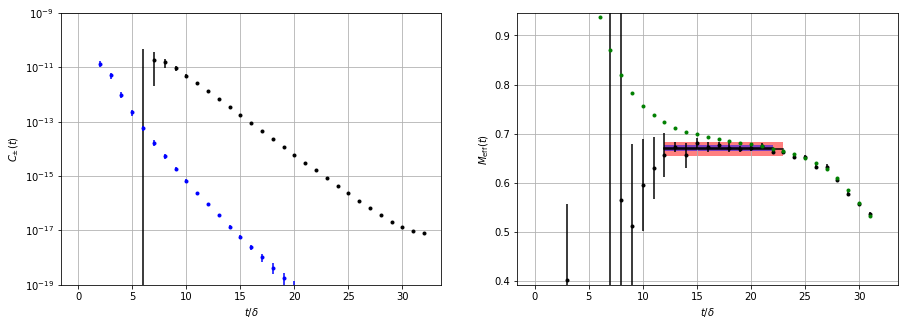

In [24]:
corr_pt=r15_pt_folded
corr_sh=r15_sh_folded
effMcorr_avg = effM_r15_sh_avg
effMcorr_err = effM_Rerr_r15_sh
t0=12;tj=1;tw=10

# fit window
tmin=12; tmax=tmin+10

CFGS = numCfg
NBS = 4*CFGS
samples = np.random.randint(0, CFGS, [NBS, CFGS])

effM = []
effMCosh = []

effMConst_fit = []

corr0 = []
corr1 = []

for sample in range(NBS):
    # first generate a bootstrap ensemble
    bscorr_pt_avg = np.mean(np.array([corr_pt[cfg] for cfg in samples[sample]]), axis = 0)
    bscorr_sh_avg = np.mean(np.array([corr_sh[cfg] for cfg in samples[sample]]), axis = 0)
    # now get the energies and coefficients
    M, invV = calcMandV(bscorr_pt_avg,bscorr_sh_avg,t0,tj,tw)
    lam, q = calcEigSys(M,invV)
    c=np.array([corr_pt[t0],corr_sh[t0]])
    m=np.matrix([[lam[0]*q[0,0],lam[1]*q[0,1]],
                 [lam[0]*q[1,0],lam[1]*q[1,1]]])
    cs=np.linalg.inv(m)@c
    alpha1=cs[0,0]*q[0,0];beta1=cs[0,1]*q[0,1]
    alpha2=cs[0,0]*q[1,0];beta2=cs[0,1]*q[1,1]
    effM.append(np.log(lam[1])/tj)
    # now rotate the corelators and calculate Cosh effective mass
    corrRotated=alpha2*bscorr_pt_avg-alpha1*bscorr_sh_avg
    corr0.append(corrRotated)
    corr1.append(-beta2*bscorr_pt_avg+beta1*bscorr_sh_avg)
    eM = [np.arccosh((corrRotated[t+1]+corrRotated[t-1])/(2*corrRotated[t])) 
        for t in range(1,len(corrRotated)-1)]
    effMCosh.append(eM)
    # now fit effective mass
    effMConst_fit.append(np.nanmean(np.array([eM[t] for t in range(tmin,tmax+1)])))

# ok, now calculate bootstrap errors and means
effM_fit_avg = np.nanmean(np.array(effM))
effM_fit_err = np.nanstd(np.array(effM))
print("matrix prony energy: ", effM_fit_avg,"+/-",effM_fit_err)
effMConst_fit_avg = np.nanmean(np.array(effMConst_fit))
effMConst_fit_err = np.nanstd(np.array(effMConst_fit))
print("cosh energy        : ",effMConst_fit_avg,"+/-",effMConst_fit_err)                         
                         
effM_avg = np.nanmean(np.array(effMCosh), axis=0)
effM_err = np.nanstd(np.array(effMCosh), axis=0)


fig, ax = plt.subplots(1,2,sharex=True,figsize=(15,5))

ax[0].grid("True")
ax[0].set_yscale('log')
ax[0].set_ylim(1e-19,1e-9)
ax[0].errorbar([t for t in range(len(corr0[0]))], np.nanmean(corr0, axis=0),yerr=np.nanstd(corr0, axis=0) , 
             fmt='ko', markersize='3',label=r'$C_0(t)$')
ax[0].errorbar([t for t in range(len(corr1[0]))], np.nanmean(corr1, axis=0),yerr=np.nanstd(corr1, axis=0) , 
             fmt='bo', markersize='3',label=r'$C_1(t)$')
ax[0].set_xlabel(r'$t/\delta$')
ax[0].set_ylabel(r'$C_{\pm}(t)$')

ax[1].set_yscale('linear')
ax[1].grid("True")
ax[1].set_xlabel(r'$t/\delta$')
ax[1].set_ylabel(r'$M_{\operatorname{eff}}(t)$')
ax[1].set_ylim(effM_fit_avg-20*effM_fit_err,effM_fit_avg+20*effM_fit_err)
ax[1].errorbar([t for t in range(1,len(effM_avg)+1)], effM_avg,yerr=effM_err , 
             fmt='ko', markersize='3',label=r'cosh')
ax[1].errorbar([t for t in range(1,len(effMcorr_avg)+1)], np.real(effMcorr_avg),yerr=effMcorr_err , 
         fmt='go', markersize='3',label=r'matrix prony')
ax[1].add_patch(patches.Rectangle((t0,effM_fit_avg-effM_fit_err), tw+tj, 2*effM_fit_err,
                               fill='True',facecolor='red',alpha=.5))
ax[1].plot([t0,t0+tw+tj],[effM_fit_avg,effM_fit_avg],'k-')
                         
ax[1].add_patch(patches.Rectangle((tmin,effMConst_fit_avg-effMConst_fit_err), tmax-tmin, 2*effMConst_fit_err,
                               fill='True',facecolor='blue',alpha=.5))
ax[1].plot([tmin,tmax],[effMConst_fit_avg,effMConst_fit_avg],'k-')

In [25]:
t0=12;tj=1;tw=10
print(matrixPronyEnergies(qG1q_pt_folded_avg,qG1q_sh_folded_avg,t0,tj,tw))
print(matrixPronyEnergies(QG2q_pt_folded_avg,QG2q_sh_folded_avg,t0,tj,tw))
print(matrixPronyEnergies(r6_pt_folded_avg,r6_sh_folded_avg,t0,tj,tw))
print(matrixPronyEnergies(r15_pt_folded_avg,r15_sh_folded_avg,t0,tj,tw))

[0.49510457 0.16140536]
[0.81553838 0.51155904]
[0.90978817 0.66355733]
[0.92769278 0.6724065 ]


Ok, let's get binding energies!

<ipython-input-19-62808b48de01>:55: RuntimeWarning: invalid value encountered in arccosh
  effMCosh_qq.append([np.arccosh(np.real((corrRotated[t+1]+corrRotated[t-1])/(2*corrRotated[t])))
<ipython-input-19-62808b48de01>:73: RuntimeWarning: invalid value encountered in arccosh
  effMCosh_Qq.append([np.arccosh(np.real((corrRotated[t+1]+corrRotated[t-1])/(2*corrRotated[t])))
<ipython-input-19-62808b48de01>:91: RuntimeWarning: invalid value encountered in arccosh
  effMCosh_r6.append([np.arccosh(np.real((corrRotated[t+1]+corrRotated[t-1])/(2*corrRotated[t])))
<ipython-input-19-62808b48de01>:109: RuntimeWarning: invalid value encountered in arccosh
  effMCosh_r15.append([np.arccosh(np.real((corrRotated[t+1]+corrRotated[t-1])/(2*corrRotated[t])))


$\Delta E_{[6]}$ =  -0.010948829837137289 +/- 0.003032590647450631
$\Delta E_{[15]}$ =  0.009628874891361792 +/- 0.0017663763706290496


<ipython-input-19-62808b48de01>:126: RuntimeWarning: Mean of empty slice
  deltaE_r6_avg = np.nanmean(np.array(deltaE_r6), axis=0)
<ipython-input-19-62808b48de01>:128: RuntimeWarning: Mean of empty slice
  deltaE_r15_avg = np.nanmean(np.array(deltaE_r15), axis=0)


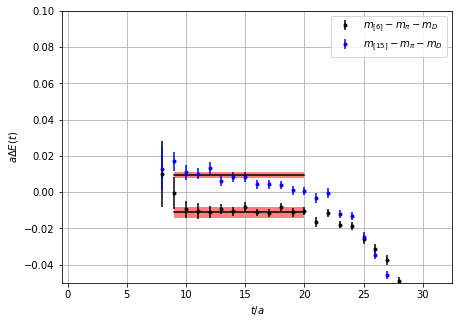

In [19]:
t0=9;tj=1;tw=10

corr_qq_pt=qG1q_pt_folded
corr_qq_sh=qG1q_sh_folded
#t0_qq=8;tj_qq=2;tw_qq=23
t0_qq=t0;tj_qq=tj;tw_qq=tw

corr_Qq_pt=QG2q_pt_folded
corr_Qq_sh=QG2q_sh_folded
#t0_Qq=15;tj_Qq=2;tw_Qq=16
t0_Qq=t0;tj_Qq=tj;tw_Qq=tw

corr_r6_sh=r6_sh_folded
corr_r6_pt=r6_pt_folded
#t0_r6=10;tj_r6=1;tw_r6=10
t0_r6=t0;tj_r6=tj;tw_r6=tw

corr_r15_sh=r15_sh_folded
corr_r15_pt=r15_pt_folded
#t0_r15=10;tj_r15=2;tw_r15=5
t0_r15=t0;tj_r15=tj;tw_r15=tw

CFGS = numCfg
NBS = 4*CFGS
samples = np.random.randint(0, CFGS, [NBS, CFGS])

effM_qq = []
effMCosh_qq = []
effM_Qq = []
effMCosh_Qq = []
effM_r6 = []
effMCosh_r6 = []
effM_r15 = []
effMCosh_r15 = []

deltaE_r6 = []
deltaE_r15 = []

for sample in range(NBS):
    # first generate a bootstrap ensemble
    bscorr_pt_avg = np.nanmean(np.array([corr_qq_pt[cfg] for cfg in samples[sample]]), axis = 0)
    bscorr_sh_avg = np.nanmean(np.array([corr_qq_sh[cfg] for cfg in samples[sample]]), axis = 0)
    # now get the energies and coefficients
    M, invV = calcMandV(bscorr_pt_avg,bscorr_sh_avg,t0_qq,tj_qq,tw_qq)
    lam, q = calcEigSys(M,invV)
    c=np.array([corr_pt[t0_qq],corr_sh[t0_qq]])
    m=np.matrix([[lam[0]*q[0,0],lam[1]*q[0,1]],
                 [lam[0]*q[1,0],lam[1]*q[1,1]]])
    cs=np.linalg.inv(m)@c
    alpha1=cs[0,0]*q[0,0];beta1=cs[0,1]*q[0,1]
    alpha2=cs[0,0]*q[1,0];beta2=cs[0,1]*q[1,1]
    effM_qq.append(np.log(lam[1])/tj_qq)
    # now rotate the corelators and calculate Cosh effective mass
    corrRotated=alpha2*bscorr_pt_avg-alpha1*bscorr_sh_avg
    effMCosh_qq.append([np.arccosh(np.real((corrRotated[t+1]+corrRotated[t-1])/(2*corrRotated[t]))) 
        for t in range(1,len(corrRotated)-1)])
    
    # first generate a bootstrap ensemble
    bscorr_pt_avg = np.nanmean(np.array([corr_Qq_pt[cfg] for cfg in samples[sample]]), axis = 0)
    bscorr_sh_avg = np.nanmean(np.array([corr_Qq_sh[cfg] for cfg in samples[sample]]), axis = 0)
    # now get the energies and coefficients
    M, invV = calcMandV(bscorr_pt_avg,bscorr_sh_avg,t0_Qq,tj_Qq,tw_Qq)
    lam, q = calcEigSys(M,invV)
    c=np.array([corr_pt[t0_Qq],corr_sh[t0_Qq]])
    m=np.matrix([[lam[0]*q[0,0],lam[1]*q[0,1]],
                 [lam[0]*q[1,0],lam[1]*q[1,1]]])
    cs=np.linalg.inv(m)@c
    alpha1=cs[0,0]*q[0,0];beta1=cs[0,1]*q[0,1]
    alpha2=cs[0,0]*q[1,0];beta2=cs[0,1]*q[1,1]
    effM_Qq.append(np.log(lam[1])/tj_Qq)
    # now rotate the corelators and calculate Cosh effective mass
    corrRotated=alpha2*bscorr_pt_avg-alpha1*bscorr_sh_avg
    effMCosh_Qq.append([np.arccosh(np.real((corrRotated[t+1]+corrRotated[t-1])/(2*corrRotated[t]))) 
        for t in range(1,len(corrRotated)-1)])
    
    # first generate a bootstrap ensemble
    bscorr_pt_avg = np.nanmean(np.array([corr_r6_pt[cfg] for cfg in samples[sample]]), axis = 0)
    bscorr_sh_avg = np.nanmean(np.array([corr_r6_sh[cfg] for cfg in samples[sample]]), axis = 0)
    # now get the energies and coefficients
    M, invV = calcMandV(bscorr_pt_avg,bscorr_sh_avg,t0_r6,tj_r6,tw_r6)
    lam, q = calcEigSys(M,invV)
    c=np.array([corr_pt[t0_r6],corr_sh[t0_r6]])
    m=np.matrix([[lam[0]*q[0,0],lam[1]*q[0,1]],
                 [lam[0]*q[1,0],lam[1]*q[1,1]]])
    cs=np.linalg.inv(m)@c
    alpha1=cs[0,0]*q[0,0];beta1=cs[0,1]*q[0,1]
    alpha2=cs[0,0]*q[1,0];beta2=cs[0,1]*q[1,1]
    effM_r6.append(np.log(lam[1])/tj_r6)
    # now rotate the corelators and calculate Cosh effective mass
    corrRotated=alpha2*bscorr_pt_avg-alpha1*bscorr_sh_avg
    effMCosh_r6.append([np.arccosh(np.real((corrRotated[t+1]+corrRotated[t-1])/(2*corrRotated[t]))) 
        for t in range(1,len(corrRotated)-1)])
    
    # first generate a bootstrap ensemble
    bscorr_pt_avg = np.nanmean(np.array([corr_r15_pt[cfg] for cfg in samples[sample]]), axis = 0)
    bscorr_sh_avg = np.nanmean(np.array([corr_r15_sh[cfg] for cfg in samples[sample]]), axis = 0)
    # now get the energies and coefficients
    M, invV = calcMandV(bscorr_pt_avg,bscorr_sh_avg,t0_r15,tj_r15,tw_r15)
    lam, q = calcEigSys(M,invV)
    c=np.array([corr_pt[t0_r15],corr_sh[t0_r15]])
    m=np.matrix([[lam[0]*q[0,0],lam[1]*q[0,1]],
                 [lam[0]*q[1,0],lam[1]*q[1,1]]])
    cs=np.linalg.inv(m)@c
    alpha1=cs[0,0]*q[0,0];beta1=cs[0,1]*q[0,1]
    alpha2=cs[0,0]*q[1,0];beta2=cs[0,1]*q[1,1]
    effM_r15.append(np.log(lam[1])/tj_r15)
    # now rotate the corelators and calculate Cosh effective mass
    corrRotated=alpha2*bscorr_pt_avg-alpha1*bscorr_sh_avg
    effMCosh_r15.append([np.arccosh(np.real((corrRotated[t+1]+corrRotated[t-1])/(2*corrRotated[t]))) 
        for t in range(1,len(corrRotated)-1)])
    
    # no calculate change in energies
    deltaE_r15.append(np.array(effMCosh_r15[len(effMCosh_r15)-1])-np.array(effMCosh_Qq[len(effMCosh_Qq)-1])
                      -effMCosh_qq[len(effMCosh_qq)-1])
    deltaE_r6.append(np.array(effMCosh_r6[len(effMCosh_r6)-1])-np.array(effMCosh_Qq[len(effMCosh_Qq)-1])
                      -effMCosh_qq[len(effMCosh_qq)-1])
    

# ok, now calculate bootstrap errors and means
deltaE_r6_fit_avg = np.nanmean(np.array(effM_r6)-np.array(effM_qq)-np.array(effM_Qq))
deltaE_r6_fit_err = np.nanstd(np.array(effM_r6)-np.array(effM_qq)-np.array(effM_Qq))
deltaE_r15_fit_avg = np.nanmean(np.array(effM_r15)-np.array(effM_qq)-np.array(effM_Qq))
deltaE_r15_fit_err = np.nanstd(np.array(effM_r15)-np.array(effM_qq)-np.array(effM_Qq))
print(r'$\Delta E_{[6]}$ = ', deltaE_r6_fit_avg,"+/-",deltaE_r6_fit_err)
print(r'$\Delta E_{[15]}$ = ', deltaE_r15_fit_avg,"+/-",deltaE_r15_fit_err)
deltaE_r6_avg = np.nanmean(np.array(deltaE_r6), axis=0)
deltaE_r6_err = np.nanstd(np.array(deltaE_r6), axis=0)
deltaE_r15_avg = np.nanmean(np.array(deltaE_r15), axis=0)
deltaE_r15_err = np.nanstd(np.array(deltaE_r15), axis=0)

fig, ax = plt.subplots(figsize=(7,5))

ax.grid("True")
ax.set_xlabel(r'$t/a$')
ax.set_ylabel(r'$a\Delta E(t)$')
#ax.set_ylim(effM_fit_avg-20*effM_fit_err,effM_fit_avg+20*effM_fit_err)
ax.set_ylim(-.05,.1)
ax.errorbar([t for t in range(1,len(deltaE_r6_avg)+1)], deltaE_r6_avg,yerr=deltaE_r6_err , 
             fmt='ko', markersize='3',label=r'$m_{[6]}-m_\pi-m_D$')
ax.plot([t0,t0+tw+tj],[deltaE_r6_fit_avg,deltaE_r6_fit_avg],'k-')
ax.errorbar([t for t in range(1,len(deltaE_r15_avg)+1)], deltaE_r15_avg,yerr=deltaE_r15_err  , 
         fmt='bo', markersize='3',label=r'$m_{[15]}-m_\pi-m_D$')
ax.plot([t0,t0+tw+tj],[deltaE_r15_fit_avg,deltaE_r15_fit_avg],'k-')
ax.add_patch(patches.Rectangle((t0,deltaE_r6_fit_avg-deltaE_r6_fit_err), tw+tj, 2*deltaE_r6_fit_err,
                               fill='True',facecolor='red',alpha=.5))
ax.add_patch(patches.Rectangle((t0,deltaE_r15_fit_avg-deltaE_r15_fit_err), tw+tj, 2*deltaE_r15_fit_err,
                               fill='True',facecolor='red',alpha=.5))
ax.legend(loc='upper right')
#ax.set_title(rf'$\Delta E_6=-52.7\pm 28.6$ MeV    $m_\pi\sim 604$ MeV');
#plt.savefig("deltaE6_ms-0.013_nx48_nt64.v2.pdf");

$\frac{C_6(t)}{C_\pi(t)C_D(t)}\to \mathcal{A}\exp\left(-(m_6-m_\pi-m_D)t\right)$

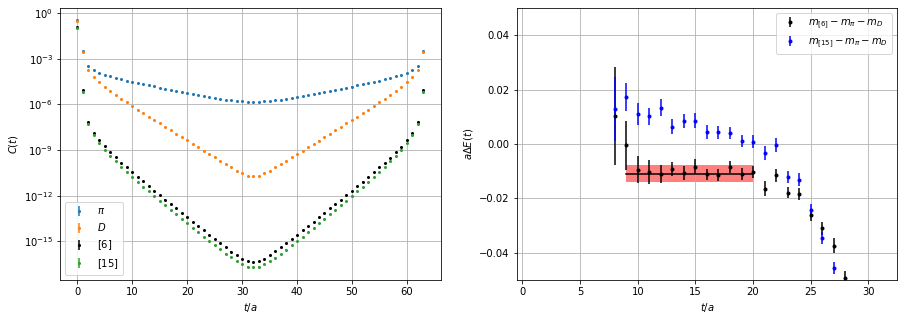

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax = axs[0]
ax.errorbar([t for t in range(nt)], np.real(qG1q_sh_avg),yerr=Rerr_qG1q_sh , fmt='o', markersize='2',label=r'$\pi$')
ax.errorbar([t for t in range(nt)], np.real(QG2q_sh_avg),yerr=Rerr_QG2q_sh , fmt='o', markersize='2',label=r'$D$')
ax.errorbar([t for t in range(nt)], np.real(r6_sh_avg),yerr=Rerr_r6_sh , fmt='ko', markersize='2',label=r'$[6]$')
ax.errorbar([t for t in range(nt)], np.real(r15_sh_avg),yerr=Rerr_r15_sh , fmt='o', markersize='2',label=r'$[15]$')
ax.set_yscale('log')
ax.grid('True')
ax.set_xlabel(r'$t/a$')
ax.set_ylabel(r'$C(t)$')
#ax.set_title('sh_sh')
ax.legend(loc="best")

ax = axs[1]
ax.grid("True")
ax.set_xlabel(r'$t/a$')
ax.set_ylabel(r'$a\Delta E(t)$')
#ax.set_ylim(effM_fit_avg-20*effM_fit_err,effM_fit_avg+20*effM_fit_err)
ax.set_ylim(-.05,.05)
ax.errorbar([t for t in range(1,len(deltaE_r6_avg)+1)], deltaE_r6_avg,yerr=deltaE_r6_err , 
             fmt='ko', markersize='3',label=r'$m_{[6]}-m_\pi-m_D$')
ax.plot([t0,t0+tw+tj],[deltaE_r6_fit_avg,deltaE_r6_fit_avg],'k-')
ax.errorbar([t for t in range(1,len(deltaE_r15_avg)+1)], deltaE_r15_avg,yerr=deltaE_r15_err  , 
         fmt='bo', markersize='3',label=r'$m_{[15]}-m_\pi-m_D$')
#ax.plot([t0,t0+tw+tj],[deltaE_r15_fit_avg,deltaE_r15_fit_avg],'k-')
ax.add_patch(patches.Rectangle((t0,deltaE_r6_fit_avg-deltaE_r6_fit_err), tw+tj, 2*deltaE_r6_fit_err,
                               fill='True',facecolor='red',alpha=.5))
#ax.add_patch(patches.Rectangle((t0,deltaE_r15_fit_avg-deltaE_r15_fit_err), tw+tj, 2*deltaE_r15_fit_err,
#                               fill='True',facecolor='red',alpha=.5))
ax.legend(loc='best')
plt.savefig('statusReportPlot.pdf');